In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.optimize import least_squares 
from tqdm import tqdm 

In [2]:
ita_df = pd.read_csv(r'C:\\Users\\Rock4\\Downloads\\ITA.csv', low_memory=False)
aut_df = pd.read_csv(r'C:\\Users\\Rock4\\Downloads\\AUT.csv', low_memory=False)

In [3]:
ita_df.head()

,id,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,...,iso_alpha_3,iso_alpha_2,iso_numeric,iso_currency,key_local,key_google_mobility,key_apple_mobility,key_jhu_csse,key_nuts,key_gadm
0,03dcf038,2020-02-24,229,7.0,1.0,4324.0,NaN,NaN,NaN,127.0,...,ITA,IT,380,EUR,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,Italy,IT,NaN,ITA
1,03dcf038,2020-02-25,322,10.0,1.0,8623.0,NaN,NaN,NaN,150.0,...,ITA,IT,380,EUR,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,Italy,IT,NaN,ITA
2,03dcf038,2020-02-26,400,12.0,3.0,9587.0,NaN,NaN,NaN,164.0,...,ITA,IT,380,EUR,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,Italy,IT,NaN,ITA
3,03dcf038,2020-02-27,650,17.0,45.0,12014.0,NaN,NaN,NaN,304.0,...,ITA,IT,380,EUR,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,Italy,IT,NaN,ITA
4,03dcf038,2020-02-28,888,21.0,46.0,15695.0,NaN,NaN,NaN,409.0,...,ITA,IT,380,EUR,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,Italy,IT,NaN,ITA


In [4]:
aut_df.head()

,id,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,...,iso_alpha_3,iso_alpha_2,iso_numeric,iso_currency,key_local,key_google_mobility,key_apple_mobility,key_jhu_csse,key_nuts,key_gadm
0,7909742a,2020-02-26,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,AUT,AT,40,EUR,NaN,ChIJfyqdJZsHbUcRr8Hk3XvUEhA,Austria,AT,NaN,AUT
1,7909742a,2020-02-27,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,AUT,AT,40,EUR,NaN,ChIJfyqdJZsHbUcRr8Hk3XvUEhA,Austria,AT,NaN,AUT
2,7909742a,2020-02-28,7.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,AUT,AT,40,EUR,NaN,ChIJfyqdJZsHbUcRr8Hk3XvUEhA,Austria,AT,NaN,AUT
3,7909742a,2020-02-29,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,AUT,AT,40,EUR,NaN,ChIJfyqdJZsHbUcRr8Hk3XvUEhA,Austria,AT,NaN,AUT
4,7909742a,2020-03-01,12.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,AUT,AT,40,EUR,NaN,ChIJfyqdJZsHbUcRr8Hk3XvUEhA,Austria,AT,NaN,AUT


### Видалення непотрібних колонок

In [5]:
print(ita_df['key_apple_mobility'].unique())

['Italy' 'Autonomous Region Friuli-Venezia Giulia'
 'Autonomous Region Trentino-Alto Adige/Südtirol' 'Molise Region'
 'Campania Region' 'Veneto Region' 'Basilicata Region' 'Lazio Region'
 'Lombardy Region' 'Piedmont Region' 'Autonomous Region Aosta Valley'
 'Sicily Region' 'Marche Region' 'Calabria Region' 'Liguria Region'
 'Umbria Region' 'Emilia-Romagna Region' 'Abruzzo Region' 'Apulia Region'
 'Tuscany Region' 'Autonomous Region Sardinia' nan 'Rome, Lazio Region'
 'Palermo, Sicily Region' 'Catania, Sicily Region'
 'Florence, Tuscany Region' 'Padova, Veneto Region'
 'Torino, Piedmont Region' 'Bergamo, Lombardy Region'
 'Bologna, Emilia-Romagna Region' 'Milan, Lombardy Region'
 'Naples, Campania Region']


In [6]:
print(ita_df['date'].min(), ita_df['date'].max())

2020-02-24 2024-10-16


In [7]:
print(aut_df['key_apple_mobility'].unique())

['Austria' 'Tyrol' 'Lower Austria' 'Carinthia' 'Styria' 'Upper Austria'
 'Vorarlberg' 'Burgenland' 'Salzburg' 'Vienna' nan 'Graz, Styria']


In [8]:
print(aut_df['date'].min(), aut_df['date'].max())

2020-02-26 2023-06-29


In [9]:
ita_df = ita_df[
    (ita_df['key_apple_mobility'] == 'Italy') & 
    (ita_df['date'] >= '2020-02-24') & 
    (ita_df['date'] <= '2024-10-16')
]

aut_df = aut_df[
    (aut_df['key_apple_mobility'] == 'Austria') & 
    (aut_df['date'] >= '2020-02-26') & 
    (aut_df['date'] <= '2023-06-29')
]

print(f"Кількість записів у Італії: {len(ita_df)}")
print(f"Кількість записів у Австрії: {len(aut_df)}")

Кількість записів у Італії: 1697
Кількість записів у Австрії: 1161


In [10]:
columns_to_drop = [
    'tests', 'vaccines', 'vent', 'hosp', 'icu', 'people_vaccinated', 'people_fully_vaccinated', 
    'school_closing', 'workplace_closing', 'cancel_events', 'gatherings_restrictions',
    'transport_closing', 'stay_home_restrictions', 'internal_movement_restrictions', 
    'international_movement_restrictions', 'information_campaigns', 'testing_policy', 
    'contact_tracing', 'facial_coverings', 'vaccination_policy', 'elderly_people_protection', 
    'government_response_index', 'stringency_index', 'containment_health_index', 
    'economic_support_index', 'administrative_area_level', 'administrative_area_level_1',
    'administrative_area_level_2', 'administrative_area_level_3', 'latitude', 'longitude', 
    'iso_alpha_2', 'iso_alpha_3', 'iso_numeric', 'iso_currency', 'key_local', 
    'key_google_mobility', 'key_apple_mobility', 'key_jhu_csse', 'key_nuts', 'key_gadm'
] 

In [11]:
aut_df = aut_df.drop(columns=columns_to_drop, errors='ignore')
ita_df = ita_df.drop(columns=columns_to_drop, errors='ignore')

### Очищення даних

In [12]:
print("Чи є дублікатні дати у Італії:", ita_df['date'].duplicated().any())
print("Чи є дублікатні дати у Австрії:", aut_df['date'].duplicated().any())

Чи є дублікатні дати у Італії: False
Чи є дублікатні дати у Австрії: False


In [13]:
ita_df = ita_df.groupby('date').agg({
    'confirmed': 'sum',
    'deaths': 'sum',
    'recovered': 'sum',
    'population': 'max'
}).reset_index() 

aut_df = aut_df.groupby('date').agg({
    'confirmed': 'sum',
    'deaths': 'sum',
    'recovered': 'sum',
    'population': 'max'
}).reset_index()

In [14]:
ita_df[['confirmed', 'deaths', 'recovered']] = ita_df[['confirmed', 'deaths', 'recovered']].fillna(0)
aut_df[['confirmed', 'deaths', 'recovered']] = aut_df[['confirmed', 'deaths', 'recovered']].fillna(0)

In [15]:
ita_df.head()

,date,confirmed,deaths,recovered,population
0,2020-02-24,229,7.0,1.0,60421760
1,2020-02-25,322,10.0,1.0,60421760
2,2020-02-26,400,12.0,3.0,60421760
3,2020-02-27,650,17.0,45.0,60421760
4,2020-02-28,888,21.0,46.0,60421760


In [16]:
aut_df.head()

,date,confirmed,deaths,recovered,population
0,2020-02-26,1.0,0.0,0.0,8840521
1,2020-02-27,3.0,0.0,0.0,8840521
2,2020-02-28,7.0,0.0,0.0,8840521
3,2020-02-29,8.0,0.0,0.0,8840521
4,2020-03-01,12.0,0.0,0.0,8840521


### Обчислення щоденних приростів

In [17]:
def calculate_daily_changes(df):
    df = df.sort_values(by='date')
    
    df['new_confirmed'] = df['confirmed'].diff().fillna(0).clip(lower=0)
    df['new_recovered'] = df['recovered'].diff().fillna(0).clip(lower=0)
    df['new_deaths'] = df['deaths'].diff().fillna(0).clip(lower=0)
    
    return df

In [18]:
ita_df = calculate_daily_changes(ita_df)
aut_df = calculate_daily_changes(aut_df) 

In [19]:
ita_df['active'] = ita_df['confirmed'] - ita_df['deaths'] - ita_df['recovered']
ita_df['active'] = ita_df['active'].clip(lower=0)

aut_df['active'] = aut_df['confirmed'] - aut_df['deaths'] - aut_df['recovered']
aut_df['active'] = aut_df['active'].clip(lower=0)

In [20]:
ita_df['susceptible'] = ita_df['population'] - ita_df['active']
ita_df['susceptible'] = ita_df['susceptible'].clip(lower=0)

aut_df['susceptible'] = aut_df['population'] - aut_df['active']
aut_df['susceptible'] = aut_df['susceptible'].clip(lower=0) 

In [21]:
ita_df.head(-10)

,date,confirmed,deaths,recovered,population,new_confirmed,new_recovered,new_deaths,active,susceptible
0,2020-02-24,229,7.0,1.0,60421760,0.0,0.0,0.0,221.0,60421539.0
1,2020-02-25,322,10.0,1.0,60421760,93.0,0.0,3.0,311.0,60421449.0
2,2020-02-26,400,12.0,3.0,60421760,78.0,2.0,2.0,385.0,60421375.0
3,2020-02-27,650,17.0,45.0,60421760,250.0,42.0,5.0,588.0,60421172.0
4,2020-02-28,888,21.0,46.0,60421760,238.0,1.0,4.0,821.0,60420939.0
...,...,...,...,...,...,...,...,...,...,...
1682,2024-10-02,26904497,197714.0,26490448.0,60421760,2097.0,1155.0,5.0,216335.0,60205425.0
1683,2024-10-03,26906570,197728.0,26492882.0,60421760,2073.0,2434.0,14.0,215960.0,60205800.0
1684,2024-10-04,26908410,197747.0,26494664.0,60421760,1840.0,1782.0,19.0,215999.0,60205761.0
1685,2024-10-05,26910198,197770.0,26495242.0,60421760,1788.0,578.0,23.0,217186.0,60204574.0


In [22]:
aut_df.head(-10)

,date,confirmed,deaths,recovered,population,new_confirmed,new_recovered,new_deaths,active,susceptible
0,2020-02-26,1.0,0.0,0.0,8840521,0.0,0.0,0.0,1.0,8840520.0
1,2020-02-27,3.0,0.0,0.0,8840521,2.0,0.0,0.0,3.0,8840518.0
2,2020-02-28,7.0,0.0,0.0,8840521,4.0,0.0,0.0,7.0,8840514.0
3,2020-02-29,8.0,0.0,0.0,8840521,1.0,0.0,0.0,8.0,8840513.0
4,2020-03-01,12.0,0.0,0.0,8840521,4.0,0.0,0.0,12.0,8840509.0
...,...,...,...,...,...,...,...,...,...,...
1146,2023-04-17,6055018.0,22329.0,6020301.0,8840521,965.0,1226.0,6.0,12388.0,8828133.0
1147,2023-04-18,6056432.0,22339.0,6021633.0,8840521,1414.0,1332.0,10.0,12460.0,8828061.0
1148,2023-04-19,6057500.0,22344.0,6022515.0,8840521,1068.0,882.0,5.0,12641.0,8827880.0
1149,2023-04-20,6058259.0,22347.0,6023058.0,8840521,759.0,543.0,3.0,12854.0,8827667.0


In [23]:
ita_df.to_csv('processed_DEU.csv', index=False)
aut_df.to_csv('processed_GBR.csv', index=False)

In [24]:
def preprocess_dates(df):
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df = df.dropna(subset=['date'])
    df = df.drop_duplicates(subset=['date']).sort_values(by='date')
    return df

def calculate_moving_average(df, window=7):
    df['new_confirmed_avg'] = df['new_confirmed'].rolling(window=window, min_periods=1).mean()
    return df

In [26]:
def plot_new_cases_trend(df, country_name):
    plt.figure(figsize=(10, 5))
    plt.plot(df['date'], df['new_confirmed_avg'], label='New Confirmed Cases (7-day average)', color='blue')
    plt.xlabel('Date')
    plt.ylabel('New Confirmed Cases')
    plt.title(f'Trend of New Confirmed Cases in {country_name}')
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_active_cases(df, country_name):
    plt.figure(figsize=(10, 5))
    plt.plot(df['date'], df['active'], label='Active Cases', color='red')
    
    plt.xlabel('Date')
    plt.ylabel('Active Cases')
    plt.title(f'Trend of Active Cases in {country_name}')
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

In [27]:
ita_df = preprocess_dates(ita_df)
aut_df = preprocess_dates(aut_df)

ita_df = calculate_moving_average(ita_df)
aut_df = calculate_moving_average(aut_df)

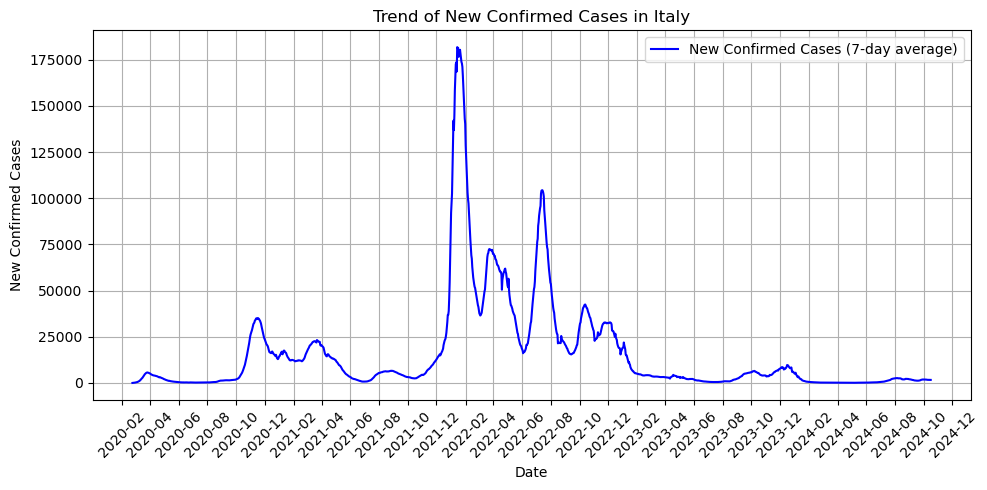

In [28]:
plot_new_cases_trend(ita_df, "Italy")

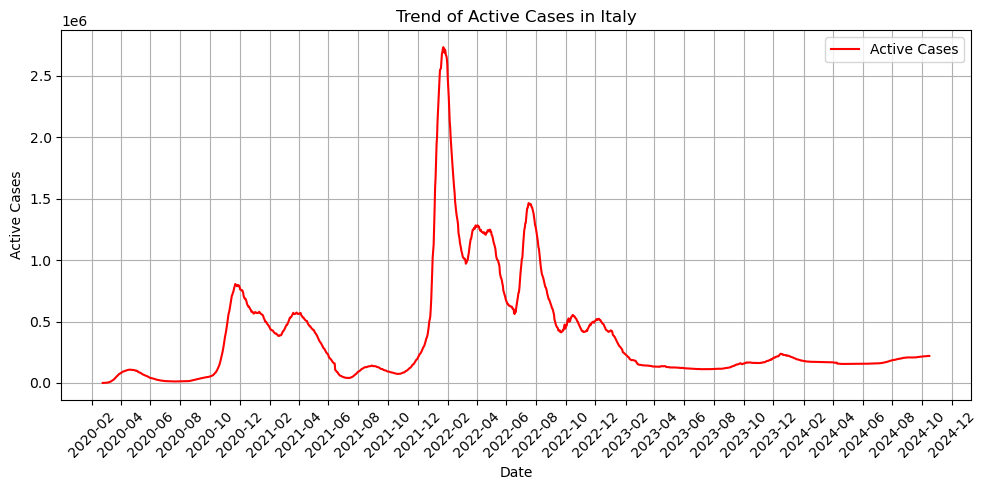

In [29]:
plot_active_cases(ita_df, "Italy")

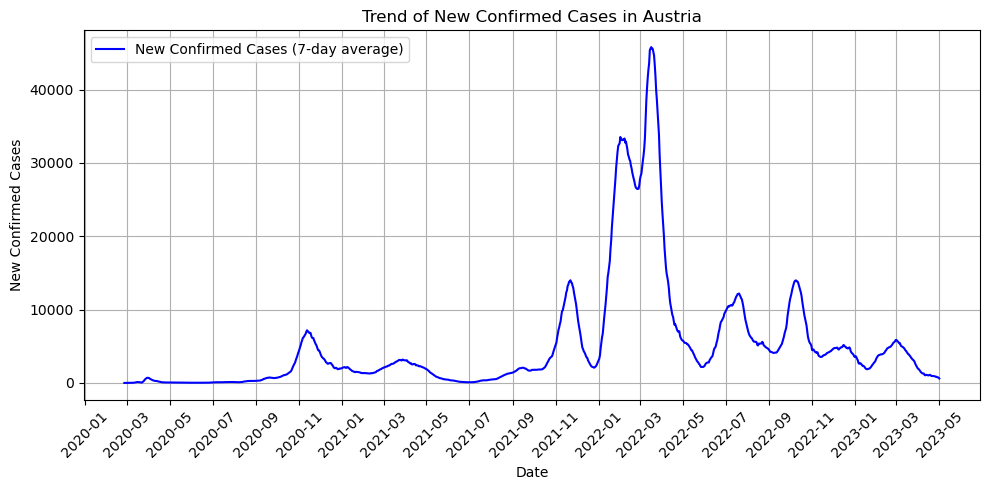

In [30]:
plot_new_cases_trend(aut_df, "Austria") 

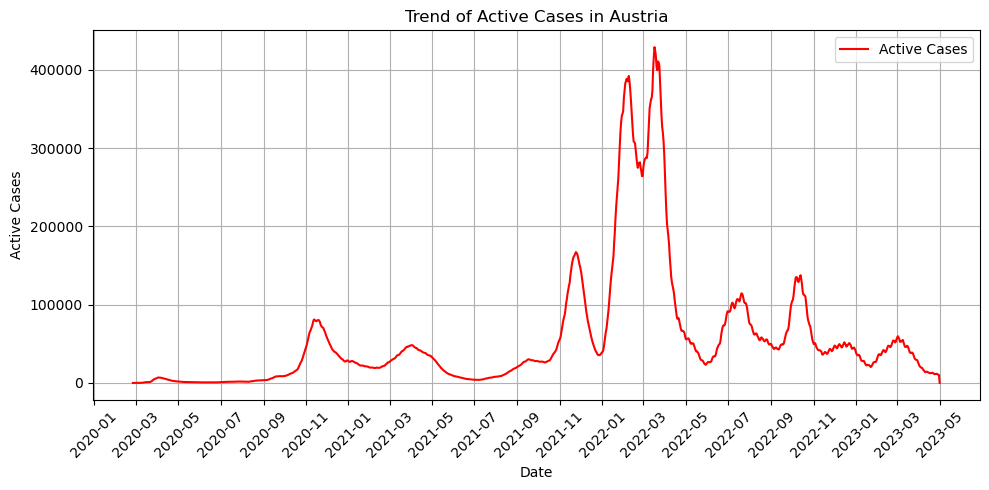

In [31]:
plot_active_cases(aut_df, "Austria")

### Підготовка датасету 

In [32]:
def preprocess_dates(df):
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df = df.dropna(subset=['date'])
    df = df.drop_duplicates(subset='date').sort_values(by='date')
    return df

def filter_by_date_range(df, start_date, end_date):
    return df[(df['date'] >= start_date) & (df['date'] <= end_date)] 

In [33]:
aut_df = preprocess_dates(aut_df)
ita_df = preprocess_dates(ita_df)

aut_spike = filter_by_date_range(aut_df, '2022-01-01', '2022-04-01')
ita_decline = filter_by_date_range(ita_df, '2022-01-15', '2022-06-01')

In [34]:
print(f"Австрія (спалах): {len(aut_spike)} записів")
print(f"Італія (затухання): {len(ita_decline)} записів") 

Австрія (спалах): 91 записів
Італія (затухання): 138 записів


In [35]:
aut_spike.head()

,date,confirmed,deaths,recovered,population,new_confirmed,new_recovered,new_deaths,active,susceptible,new_confirmed_avg
675,2022-01-01,1275012.0,16737.0,1218881.0,8840521,3000.0,1986.0,8.0,39394.0,8801127.0,3043.285714
676,2022-01-02,1278481.0,16749.0,1220771.0,8840521,3469.0,1890.0,12.0,40961.0,8799560.0,3291.428571
677,2022-01-03,1284463.0,16772.0,1222966.0,8840521,5982.0,2195.0,23.0,44725.0,8795796.0,3776.000000
678,2022-01-04,1294508.0,16784.0,1225574.0,8840521,10045.0,2608.0,12.0,52150.0,8788371.0,4735.428571
679,2022-01-05,1303271.0,16794.0,1227983.0,8840521,8763.0,2409.0,10.0,58494.0,8782027.0,5534.714286


In [36]:
ita_decline.head()

,date,confirmed,deaths,recovered,population,new_confirmed,new_recovered,new_deaths,active,susceptible,new_confirmed_avg
691,2022-01-15,8549450,140856.0,5937747.0,60421760,192936.0,120609.0,308.0,2470847.0,57950913.0,181164.714286
692,2022-01-16,8706915,141104.0,6016954.0,60421760,157465.0,79207.0,248.0,2548857.0,57872903.0,181425.142857
693,2022-01-17,8790302,141391.0,6093633.0,60421760,83387.0,76679.0,287.0,2555278.0,57866482.0,176565.428571
694,2022-01-18,9018425,141825.0,6314444.0,60421760,228123.0,220811.0,434.0,2562156.0,57859604.0,177651.714286
695,2022-01-19,9219391,142205.0,6450596.0,60421760,200966.0,136152.0,380.0,2626590.0,57795170.0,178331.857143


In [37]:
aut_spike.to_csv('AUT_spike.csv', index=False)
ita_decline.to_csv('ITA_decline.csv', index=False)

### SIR-F

In [38]:
aut_data = pd.read_csv('AUT_spike.csv')
ita_data = pd.read_csv('ITA_decline.csv')

aut_data['date'] = pd.to_datetime(aut_data['date'])
ita_data['date'] = pd.to_datetime(ita_data['date'])

def preprocess_data(df):
    N = df['population'].iloc[0]
    df = df[['date', 'confirmed', 'deaths', 'recovered', 'active', 'susceptible']].copy()
    df.loc[:, 'infected'] = df['active']
    df.loc[:, 'recovered'] = df['recovered']
    df.loc[:, 'fatalities'] = df['deaths']
    df.loc[:, 'susceptible'] = df['susceptible']
    return df, N

aut_df, N_aut = preprocess_data(aut_data)
ita_df, N_ita = preprocess_data(ita_data)

In [39]:
def deriv(y, t, N, theta, kappa, rho, sigma, tau):
    S, I, Ru, C, Rc, F = y
    dSdt = -theta * S * I / N
    dIdt = theta * S * I / N - kappa * I - rho * I
    dRudt = kappa * I
    dCdt = rho * I - sigma * C - tau * C
    dRcdt = sigma * C
    dFdt = tau * C
    return dSdt, dIdt, dRudt, dCdt, dRcdt, dFdt 

In [40]:
def residuals(params, y0, t, data, N):
    theta, kappa, rho, sigma, tau = params
    ret = odeint(deriv, y0, t, args=(N, theta, kappa, rho, sigma, tau))
    S, I, Ru, C, Rc, F = ret.T
    confirmed_cases = C + Rc + F
    recovered_cases = Rc
    fatalities = F
    confirmed_data = data['confirmed'].values
    recovered_data = data['recovered'].values
    fatalities_data = data['fatalities'].values
    res = np.concatenate((
        confirmed_cases - confirmed_data,
        recovered_cases - recovered_data,
        fatalities - fatalities_data
    ))
    return res

In [41]:
def fit_sirf_model(df, N, verbose=False):
    I0 = df['infected'].iloc[0]
    C0 = df['confirmed'].iloc[0]
    Ru0 = 0
    Rc0 = df['recovered'].iloc[0]
    F0 = df['fatalities'].iloc[0]
    S0 = N - I0 - C0 - Ru0 - Rc0 - F0
    y0 = S0, I0, Ru0, C0, Rc0, F0
    t = np.arange(len(df))
    initial_guess = [0.2, 0.1, 0.1, 0.1, 0.01]
    bounds = [(0, 1)] * 5
    ret = minimize(
        lambda params: np.sum(residuals(params, y0, t, df, N)**2),
        initial_guess,
        bounds=bounds,
        method='L-BFGS-B'
    )
    theta, kappa, rho, sigma, tau = ret.x
    if verbose:
        print(f'Підібрані параметри: theta={theta}, kappa={kappa}, rho={rho}, sigma={sigma}, tau={tau}')
    ret = odeint(deriv, y0, t, args=(N, theta, kappa, rho, sigma, tau))
    S, I, Ru, C, Rc, F = ret.T
    return t, S, I, Ru, C, Rc, F, theta, kappa, rho, sigma, tau 

In [42]:
def get_parameters_over_time(df, N, window_size=14, verbose=False):
    parameters = []
    dates = []
    for i in tqdm(range(len(df) - window_size), desc='Processing windows'):
        df_window = df.iloc[i:i+window_size]
        t_window, S, I, Ru, C, Rc, F, theta, kappa, rho, sigma, tau = fit_sirf_model(df_window, N, verbose)
        parameters.append([theta, kappa, rho, sigma, tau])
        dates.append(df_window['date'].iloc[-1])
    parameters = np.array(parameters)
    param_df = pd.DataFrame(parameters, columns=['theta', 'kappa', 'rho', 'sigma', 'tau'])
    param_df['date'] = dates
    return param_df  

Визначення параметрів моделі для Австрії...


Processing windows: 100%|██████████| 77/77 [00:04<00:00, 17.36it/s]


          theta     kappa  rho     sigma       tau       date
0  4.224653e-08  1.000000  0.0  0.002337  0.000009 2022-01-14
1  1.569633e-06  0.999993  0.0  0.002601  0.000008 2022-01-15
2  0.000000e+00  1.000000  0.0  0.002885  0.000006 2022-01-16
3  0.000000e+00  1.000000  0.0  0.003187  0.000006 2022-01-17
4  0.000000e+00  1.000000  0.0  0.003579  0.000005 2022-01-18


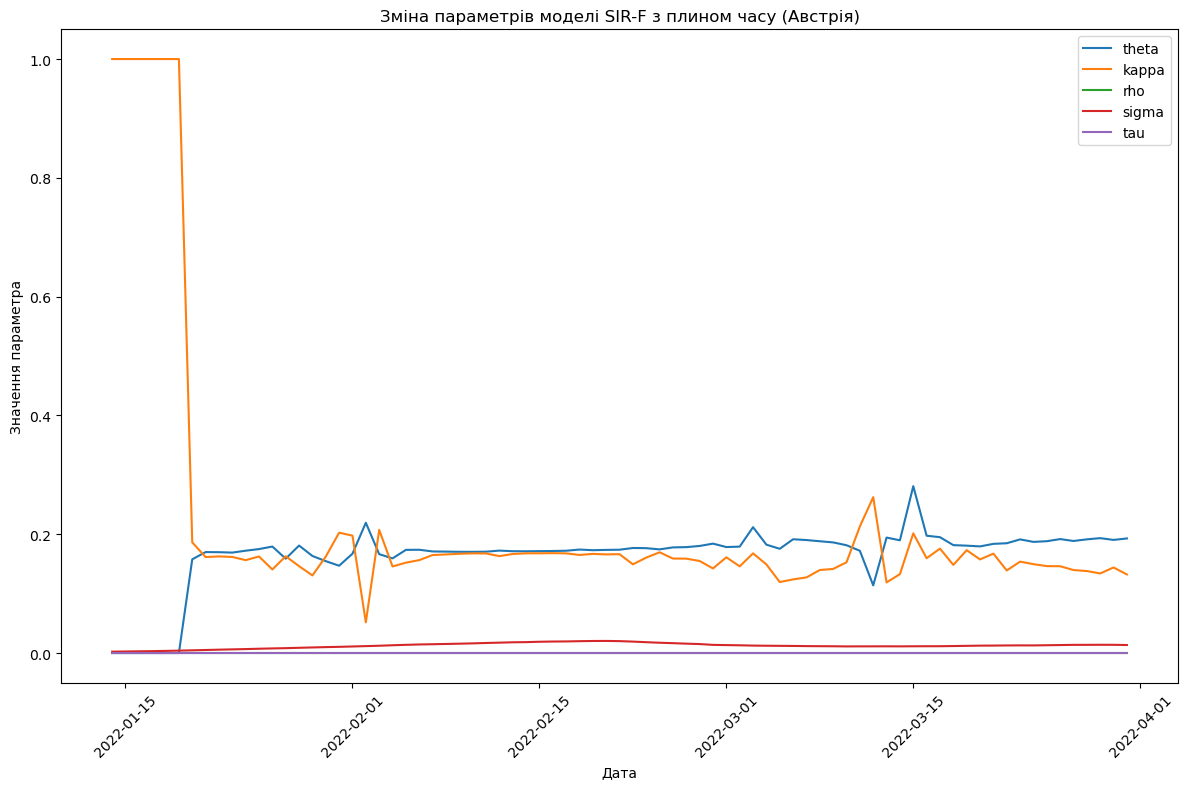

In [43]:
print('Визначення параметрів моделі для Австрії...')
param_df_aut = get_parameters_over_time(aut_df, N_aut, verbose=False)

print(param_df_aut.head())

param_names = ['theta', 'kappa', 'rho', 'sigma', 'tau']
plt.figure(figsize=(12,8))
for param_name in param_names:
    plt.plot(param_df_aut['date'], param_df_aut[param_name], label=param_name)
plt.xlabel('Дата')
plt.ylabel('Значення параметра')
plt.title('Зміна параметрів моделі SIR-F з плином часу (Австрія)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 

Визначення параметрів моделі для Італії...


Processing windows: 100%|██████████| 124/124 [00:07<00:00, 16.94it/s]


      theta     kappa  rho     sigma       tau       date
0  0.161930  0.176706  0.0  0.018130  0.000015 2022-01-28
1  0.162023  0.177371  0.0  0.018991  0.000024 2022-01-29
2  0.162242  0.178317  0.0  0.019999  0.000037 2022-01-30
3  0.162620  0.176824  0.0  0.018324  0.000030 2022-01-31
4  0.162863  0.177945  0.0  0.018243  0.000029 2022-02-01


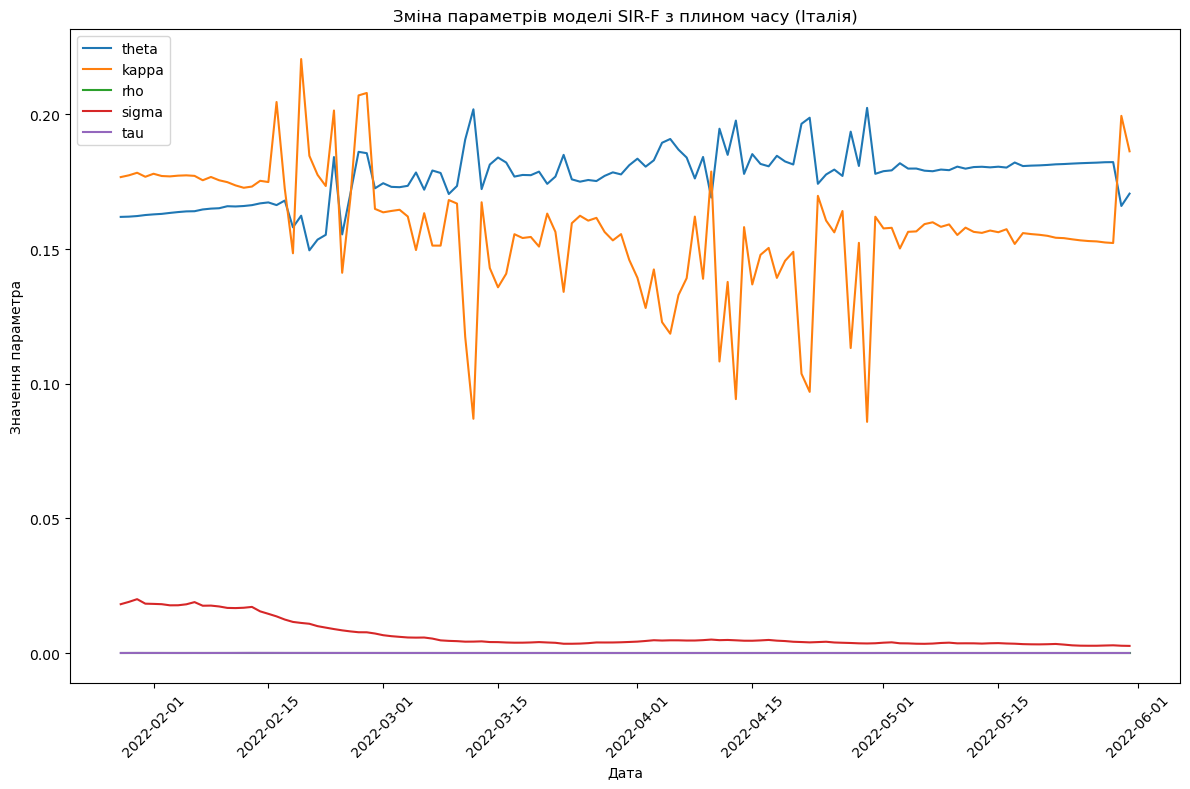

In [44]:
print('Визначення параметрів моделі для Італії...')
param_df_ita = get_parameters_over_time(ita_df, N_ita, verbose=False)

print(param_df_ita.head())

plt.figure(figsize=(12,8))
for param_name in param_names:
    plt.plot(param_df_ita['date'], param_df_ita[param_name], label=param_name)
plt.xlabel('Дата')
plt.ylabel('Значення параметра')
plt.title('Зміна параметрів моделі SIR-F з плином часу (Італія)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 

In [45]:
print('Середні значення параметрів для Австрії:')
print(param_df_aut[param_names].mean())

print('\nСередні значення параметрів для Італії:')
print(param_df_ita[param_names].mean())

Середні значення параметрів для Австрії:
theta    0.165184
kappa    0.223426
rho      0.000000
sigma    0.012396
tau      0.000005
dtype: float64

Середні значення параметрів для Італії:
theta    0.176815
kappa    0.157009
rho      0.000000
sigma    0.006715
tau      0.000016
dtype: float64


### Прогноз 

In [46]:
def forecast(df, N, days_ahead, params):
    theta, kappa, rho, sigma, tau = params
    I0 = df['infected'].iloc[-1]
    C0 = df['confirmed'].iloc[-1]
    Ru0 = 0
    Rc0 = df['recovered'].iloc[-1]
    F0 = df['fatalities'].iloc[-1]
    S0 = N - I0 - C0 - Ru0 - Rc0 - F0
    y0 = S0, I0, Ru0, C0, Rc0, F0
    t = np.arange(days_ahead)
    ret = odeint(deriv, y0, t, args=(N, theta, kappa, rho, sigma, tau))
    S, I, Ru, C, Rc, F = ret.T
    dates = pd.date_range(start=df['date'].iloc[-1] + pd.Timedelta(days=1), periods=days_ahead)
    forecast_df = pd.DataFrame({
        'date': dates,
        'Infected': I + C,
        'Fatal': F,
        'Recovered': Rc + Ru
    })
    return forecast_df

def analyze_forecast(forecast_df):
    max_infected = forecast_df['Infected'].max()
    peak_date = forecast_df.loc[forecast_df['Infected'].idxmax(), 'date']
    zero_infected_df = forecast_df[forecast_df['Infected'] < 1]
    if not zero_infected_df.empty:
        zero_infected_date = zero_infected_df.iloc[0]['date']
    else:
        zero_infected_date = None
    return peak_date, zero_infected_date

In [47]:
params_aut = param_df_aut[['theta', 'kappa', 'rho', 'sigma', 'tau']].values
params_ita = param_df_ita[['theta', 'kappa', 'rho', 'sigma', 'tau']].values

In [48]:
print('Прогноз для Австрії на 7, 30 та 300 днів...')
forecast_periods = [7, 30, 300]
for days in forecast_periods:
    forecast_df = forecast(aut_df, N_aut, days, params_aut[-1])
    print(f'\nПрогноз на {days} днів:')
    print(forecast_df.tail())

Прогноз для Австрії на 7, 30 та 300 днів...

Прогноз на 7 днів:
        date      Infected         Fatal     Recovered
2 2022-04-04  3.999799e+06  19058.783897  3.772481e+06
3 2022-04-05  3.926997e+06  19093.956415  3.849860e+06
4 2022-04-06  3.857146e+06  19128.657868  3.923792e+06
5 2022-04-07  3.790008e+06  19162.894565  3.994571e+06
6 2022-04-08  3.725365e+06  19196.672730  4.062462e+06

Прогноз на 30 днів:
         date      Infected         Fatal     Recovered
25 2022-04-27  2.793986e+06  19759.033928  5.017699e+06
26 2022-04-28  2.755020e+06  19784.828007  5.056993e+06
27 2022-04-29  2.716738e+06  19810.276627  5.095567e+06
28 2022-04-30  2.679113e+06  19835.384414  5.133451e+06
29 2022-05-01  2.642121e+06  19860.155932  5.170672e+06

Прогноз на 300 днів:
          date      Infected         Fatal     Recovered
295 2023-01-22  72863.366165  21634.440248  7.740332e+06
296 2023-01-23  71887.508224  21635.117038  7.741308e+06
297 2023-01-24  70924.719953  21635.784763  7.742270e+06

In [49]:
print('\nПрогноз для Італії на 7, 30 та 300 днів...')
for days in forecast_periods:
    forecast_df = forecast(ita_df, N_ita, days, params_ita[-1])
    print(f'\nПрогноз на {days} днів:')
    print(forecast_df.tail()) 


Прогноз для Італії на 7, 30 та 300 днів...

Прогноз на 7 днів:
        date      Infected          Fatal     Recovered
2 2022-06-04  1.788015e+07  166952.283705  1.691944e+07
3 2022-06-05  1.777662e+07  167050.035724  1.705898e+07
4 2022-06-06  1.767940e+07  167147.528772  1.718826e+07
5 2022-06-07  1.758784e+07  167244.763535  1.730837e+07
6 2022-06-08  1.750133e+07  167341.740697  1.742029e+07

Прогноз на 30 днів:
         date      Infected          Fatal     Recovered
25 2022-06-27  1.635888e+07  169136.259595  1.874597e+07
26 2022-06-28  1.631153e+07  169228.225683  1.879576e+07
27 2022-06-29  1.626474e+07  169319.948129  1.884471e+07
28 2022-06-30  1.621847e+07  169411.427577  1.889291e+07
29 2022-07-01  1.617266e+07  169502.664672  1.894041e+07

Прогноз на 300 днів:
          date      Infected          Fatal     Recovered
295 2023-03-24  7.974185e+06  186889.574886  2.713615e+07
296 2023-03-25  7.953059e+06  186934.507737  2.715723e+07
297 2023-03-26  7.931990e+06  186979.3215

In [50]:
forecast_period = 7000

In [51]:
print('Прогноз та аналіз для Австрії...')
forecast_df_aut = forecast(
    aut_df, 
    N_aut, 
    forecast_period, 
    params_aut[-1]
)
peak_date_aut, zero_infected_date_aut = analyze_forecast(forecast_df_aut)

print(
    f'Найближчий пік захворюваності в Австрії очікується: '
    f'{peak_date_aut.date()}'
)
if zero_infected_date_aut:
    print(
        f'Очікується, що в Австрії не залишиться хворих на COVID-19 до: '
        f'{zero_infected_date_aut.date()}'
    )
else:
    print(
        'Протягом прогнозованого періоду в Австрії все ще залишатимуться '
        'хворі на COVID-19.'
    )

Прогноз та аналіз для Австрії...
Найближчий пік захворюваності в Австрії очікується: 2022-04-02
Очікується, що в Австрії не залишиться хворих на COVID-19 до: 2025-05-02


In [52]:
print('\nПрогноз та аналіз для Італії...')
forecast_df_ita = forecast(
    ita_df, 
    N_ita, 
    forecast_period, 
    params_ita[-1]
)
peak_date_ita, zero_infected_date_ita = analyze_forecast(forecast_df_ita)

print(
    f'Найближчий пік захворюваності в Італії очікується: '
    f'{peak_date_ita.date()}'
)
if zero_infected_date_ita:
    print(
        f'Очікується, що в Італії не залишиться хворих на COVID-19 до: '
        f'{zero_infected_date_ita.date()}'
    )
else:
    print(
        'Протягом прогнозованого періоду в Італії все ще залишатимуться '
        'хворі на COVID-19.'
    ) 


Прогноз та аналіз для Італії...
Найближчий пік захворюваності в Італії очікується: 2022-06-02
Очікується, що в Італії не залишиться хворих на COVID-19 до: 2039-08-18


In [53]:
print('\nПорівняння отриманих результатів:')
print(
    f'Австрія - пік: {peak_date_aut.date()}, завершення епідемії: '
    f'{zero_infected_date_aut.date() if zero_infected_date_aut else "не визначено"}'
)
print(
    f'Італія - пік: {peak_date_ita.date()}, завершення епідемії: '
    f'{zero_infected_date_ita.date() if zero_infected_date_ita else "не визначено"}'
) 


Порівняння отриманих результатів:
Австрія - пік: 2022-04-02, завершення епідемії: 2025-05-02
Італія - пік: 2022-06-02, завершення епідемії: 2039-08-18
